# Some Tricks
Not everything you can do in a notebook works properly when shared over `jupyterlab-dat`, but there are some pretty cool things that do work.

In [3]:
import IPython

# Styling for presentation

There's a lot going on in Lab by default: you may want to turn some of the UI noise down.

In [4]:
IPython.display.HTML("""
<style>
#main .jp-InputPrompt,
#main .jp-OutputPrompt { opacity: 0.5; position:absolute; z-index: 999; right: 0;}
#main #jp-top-panel:not(:hover),
#main #jp-bottom-panel:not(:hover),
#main .jp-SideBar:not(:hover),
#main .jp-Toolbar:not(:hover)
{opacity: 0.1;}
</style>
""")

## DataFrames

In [5]:
import pandas
df = pandas.util.testing.makeDataFrame()
df.head()

,A,B,C,D
LkZkIRQUCS,1.449934,-0.854557,0.598415,0.102229
K08GDK8vAs,0.687218,1.959784,0.337033,-0.631444
tShKCfFREU,0.701311,-0.227062,-0.346315,0.996743
aK8uHL69Bk,-0.147286,0.178798,-0.928764,-1.275153
qyEu5R808t,0.981989,1.441187,0.425542,0.892666


## Plotting

![](https://cdn11.bigcommerce.com/s-ufhcuzfxw9/products/11834/images/17345/HOME-LST__54817.1549918125.500.750.jpg?c=2)

## matplotlib

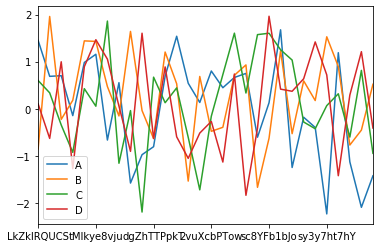

In [6]:
%matplotlib inline
df.plot();

## hvplot

In [8]:
import hvplot.pandas
df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

# VDOM
[vdom](https://github.com/nteract/vdom) has almost the same expressive power as widgets, but at least part of it doesn't use comm.

In [41]:
import vdom as h 
some_vdom = h.h1("Hello VDOM 👋")
a_vdom_handle = display(some_vdom, display_id=True)

<h2>Buh-bye! 👋 </h2>

In [42]:
a_vdom_handle.update(h.h2("Buh-bye! 👋 "));

# Command Linking
You can publish URLs that enable JupyterLab commands, the basic building block of core and most plugins... they can be a bit hard to find, running 
```js
$x("//*[@data-command]").map((x) => x.attributes["data-command"].value)
```
in your browser console <kbd>F12</kbd> will list all the ones currently bound to elements on the screen on the screen, but you'll usually end up having to find them in the source.

In [26]:
import json, tornado.escape
def command_link(cmd, label=None, args=None):
    args = tornado.escape.xhtml_escape(json.dumps(args or {}))
    return IPython.display.HTML(f"""
    <a href="https://jupyter.org" 
        data-commandlinker-command="{cmd}"
        data-commandlinker-args="{args}">{label or cmd}</a>
    """)
display(
    command_link("notebook:restart-run-all"),
    command_link("application:toggle-presentation-mode", "Toggle Presentation Mode"),
    *[command_link("apputils:change-theme", f"Use {theme} Theme", 
                     {"theme": f"JupyterLab {theme}"})
        for theme in ["Light", "Dark"]]
)

# One-click URL
If you are using a JupyterHub (like [Binder](https://mybinder.org)), you can create clickable links that will launch right into a shared stream. While _widgets don't work_ without the end user running our notebook, they are pretty handy for some quick UI.

In [53]:
import re, io, qrcode.image.svg, ipywidgets as W, traitlets as T

In [78]:
@W.interact()
def make_link_and_qr(
    hub = W.Text("https://mybinder.org/v2/gh/"), repo = W.Text("deathbeds/jupyterlab-dat"), branch = W.Text("master"),
    dat = W.Textarea(placeholder="dat://", rows=4), color = W.ColorPicker(value="#2aca4b"), size = W.IntSlider(20, min=10, max=100),
):
    url = f"{hub}{repo}/{branch}?urlpath=lab/tree/dat-mkii/{dat.replace('dat://', '')}"
    qr = qrcode.QRCode(box_size=size)
    qr.add_data(url)
    qr_img = qr.make_image(qrcode.image.svg.SvgPathImage)
    out = io.BytesIO()
    qr_img._write(out)
    svg = re.sub(
        '<svg.*?viewbox',
        '<svg viewbox',
        out.getvalue().decode("utf-8")
    )
    svg = re.sub('#000000', color, svg)
    svg_url = f"data:image/svg+xml;utf-8,{urllib.parse.quote(svg)}"
    
    return IPython.display.HTML(f"""
        <a href="{url}" style="text-decoration: underline; font-size: 2rem; color: {color};">DRAG DAT ⬡</a>
        <br/>
        <i>or Ctrl+Shift click, Copy Link Address</i>
        <br/>
        <code>{url}</code>
        <br/>
        <a href="data:image/svg+xml;{svg_url}"><img src="{svg_url}" /></a>
    """)

interactive(children=(Text(value='https://mybinder.org/v2/gh/', description='hub'), Text(value='deathbeds/jupy…

You _can_, however, show the last known state of a `ipywidgets.interact`

In [75]:
[IPython.display.display(out["data"], raw=True) 
 for out in 
 make_link_and_qr.widget.children[-1].outputs];